# Import Library 

In [1]:
pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------ --------------- 0.9/1.4 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 22.8 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#from apyori import apriori
import os
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori
import matplotlib.pyplot as plt 

# Import Data

In [3]:
data=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\Advanced ML\MBA\groceries2.csv")
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13608\144987071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=data['Item 1'],


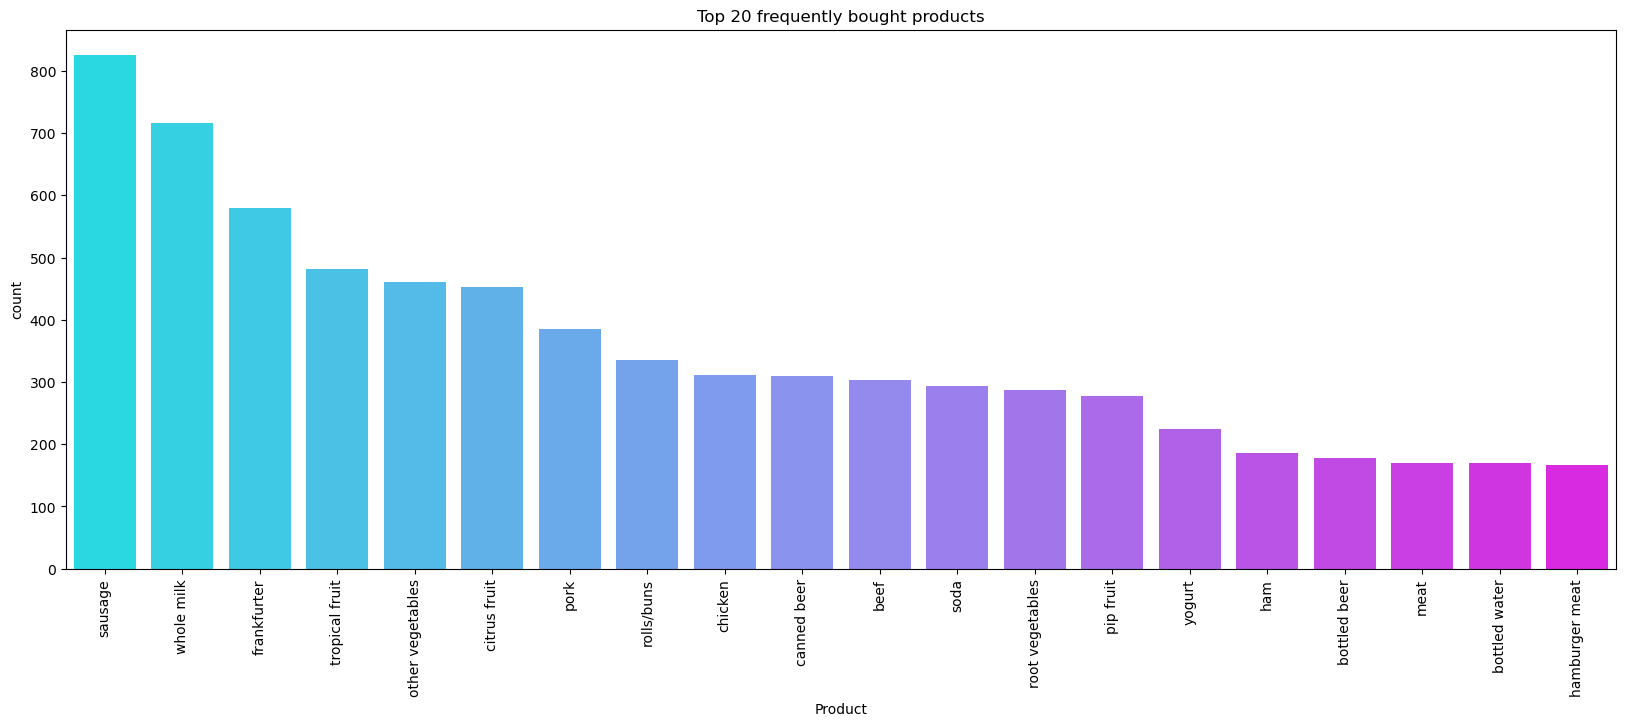

In [5]:
#Top 20 frequently buying items by customer
plt.rcParams['figure.figsize']=20,7
sns.countplot(data=data, x=data['Item 1'],
             order = data['Item 1'].value_counts().head(20).index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

In [10]:
#let's create a list of list of transaction
records = []
for i in range(0, len(data)):
    records.append([str(data.values[i,j]) for j in range(1, data.values[i, 0]+1)])

In [12]:
records

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [14]:
#Let's analyze the no. of items wrt each transaction
counts = [len(abc) for abc in records]
print(f'50 percent of the transactions are having items below or equal to {np.quantile(counts, .5)} only')
print(f'particular transaction having a maximum of {np.quantile(counts, 1)} items in it')

50 percent of the transactions are having items below or equal to 3.0 only
particular transaction having a maximum of 32 items in it


In [16]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
onehot = te.fit_transform(records)
onehot = pd.DataFrame(onehot, columns = te.columns_)

Using Transactionencoder we can transform this dataset into a logical data frame.
Each column represents an item and each row represent a record or a transaction for one purchase.

In [19]:
onehot.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [21]:
#Shape of encoded onehot dataset
print(f'No.of Transection data: {onehot.shape[0]} rows and {onehot.shape[1]} columns')

No.of Transection data: 9835 rows and 169 columns


In [23]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

frequent_itemsets = apriori(onehot, min_support=0.001,use_colnames=True, max_len=3,verbose=1)

frequent_itemsets

Processing 411195 combinations | Sampling itemset size 3


,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.003559,(abrasive cleaner)
3,0.003254,(artif. sweetener)
4,0.017692,(baking powder)
...,...,...
9964,0.003559,"(yogurt, whole milk, waffles)"
9965,0.003050,"(whipped/sour cream, whole milk, white bread)"
9966,0.002135,"(whipped/sour cream, yogurt, white bread)"
9967,0.010880,"(whipped/sour cream, yogurt, whole milk)"


In [24]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)  
rules = rules.sort_values('lift', ascending=False)

In [25]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9817,(liquor),"(bottled beer, red/blush wine)",0.011083,0.004881,0.001932,0.174312,35.715787,0.001878,1.205200,0.982894
9812,"(bottled beer, red/blush wine)",(liquor),0.004881,0.011083,0.001932,0.395833,35.715787,0.001878,1.636828,0.976768
5434,"(soda, hamburger meat)",(Instant food products),0.005796,0.008033,0.001220,0.210526,26.209194,0.001174,1.256492,0.967452
5439,(Instant food products),"(soda, hamburger meat)",0.008033,0.005796,0.001220,0.151899,26.209194,0.001174,1.172271,0.969634
34595,(processed cheese),"(ham, white bread)",0.016573,0.005084,0.001932,0.116564,22.928221,0.001848,1.126190,0.972503


In [26]:
Output = round(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']],3)  # rounding off number by 2 digit after decimal 

Output.head(10)

,antecedents,consequents,support,confidence,lift
9817,(liquor),"(bottled beer, red/blush wine)",0.002,0.174,35.716
9812,"(bottled beer, red/blush wine)",(liquor),0.002,0.396,35.716
5434,"(soda, hamburger meat)",(Instant food products),0.001,0.211,26.209
5439,(Instant food products),"(soda, hamburger meat)",0.001,0.152,26.209
34595,(processed cheese),"(ham, white bread)",0.002,0.117,22.928
34594,"(ham, white bread)",(processed cheese),0.002,0.380,22.928
9816,(red/blush wine),"(bottled beer, liquor)",0.002,0.101,21.494
9813,"(bottled beer, liquor)",(red/blush wine),0.002,0.413,21.494
5438,(hamburger meat),"(soda, Instant food products)",0.001,0.037,18.996
5435,"(soda, Instant food products)",(hamburger meat),0.001,0.632,18.996


In [31]:
targeted_rules = Output[Output['consequents'] == {'Instant food products'}].copy()
targeted_rules

,antecedents,consequents,support,confidence,lift
5434,"(soda, hamburger meat)",(Instant food products),0.001,0.211,26.209
5428,"(rolls/buns, hamburger meat)",(Instant food products),0.001,0.118,14.646
5440,"(whole milk, hamburger meat)",(Instant food products),0.002,0.103,12.879
12,(hamburger meat),(Instant food products),0.003,0.092,11.421
7,(curd),(Instant food products),0.001,0.025,3.089
2,(butter),(Instant food products),0.001,0.022,2.741
5446,"(root vegetables, other vegetables)",(Instant food products),0.001,0.021,2.672
5452,"(whole milk, other vegetables)",(Instant food products),0.002,0.020,2.537
5464,"(yogurt, whole milk)",(Instant food products),0.001,0.020,2.485
5458,"(rolls/buns, whole milk)",(Instant food products),0.001,0.020,2.459


In [33]:
targeted_rules = Output[Output['consequents'] == {'butter milk'}].copy()
targeted_rules

,antecedents,consequents,support,confidence,lift
17180,"(dessert, pip fruit)",(butter milk),0.001,0.286,10.218
17114,"(cream cheese, pip fruit)",(butter milk),0.001,0.167,5.961
17192,"(dessert, yogurt)",(butter milk),0.002,0.165,5.899
17620,"(sliced cheese, yogurt)",(butter milk),0.001,0.165,5.885
17186,"(dessert, whole milk)",(butter milk),0.002,0.148,5.298
...,...,...,...,...,...
1142,(margarine),(butter milk),0.002,0.035,1.242
654,(bottled water),(butter milk),0.004,0.034,1.217
1104,(candy),(butter milk),0.001,0.034,1.216
17520,"(rolls/buns, soda)",(butter milk),0.001,0.032,1.138


In [35]:
filtered_rules = targeted_rules[(targeted_rules['confidence'] > 0.1) &
                                (targeted_rules['lift'] > 1.00)]
filtered_rules

,antecedents,consequents,support,confidence,lift
17180,"(dessert, pip fruit)",(butter milk),0.001,0.286,10.218
17114,"(cream cheese, pip fruit)",(butter milk),0.001,0.167,5.961
17192,"(dessert, yogurt)",(butter milk),0.002,0.165,5.899
17620,"(sliced cheese, yogurt)",(butter milk),0.001,0.165,5.885
17186,"(dessert, whole milk)",(butter milk),0.002,0.148,5.298
17120,"(cream cheese, rolls/buns)",(butter milk),0.001,0.143,5.109
17144,"(pip fruit, curd)",(butter milk),0.001,0.143,5.109
17248,"(pip fruit, frozen vegetables)",(butter milk),0.001,0.139,4.967
17648,"(yogurt, waffles)",(butter milk),0.001,0.135,4.833
17408,"(sliced cheese, other vegetables)",(butter milk),0.001,0.135,4.822


# Finished

support_table = filtered_rules.pivot(index='consequents', columns='antecedents', values='lift')
support_table

sns.heatmap(support_table)

Output.to_csv("demo.csv")